Let's practice:

1). Divide the dataset into  k  (let  k =10 at first) clusters using k-means method that you implemented in previous homework. Assign digit to each clusters according to prevalent digit in the cluster. Show centroids (using imshow) and assigned labels.

2). Write a function that calculates error rate (i.e. number of incorrect classified items relative to total number of items), compute error rate for obtained clusters.

3). Calculate and visualize a confusion matrix ( aij ), where  i  is predicted digit,  j  is true digit,  aij  is the number of items with predicted digit  i  and true digit  j . Make conclusions (which digits are confused at most, which are predicted with better accuracy).

4). Plot a graphic of error rate against number of clusters  k , vary  k  in some range. Select optimal value of  k , explain your choice.

5). Show centroids and prevalent digits for optimal  k . For which digits there is more than one cluster? For which digits there is exactly one cluster? Visualize a new confusion matrix. Make conclusions.

6). (extra) Suggest improvements for better classification accuracy.

In [1]:
import  numpy as  np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

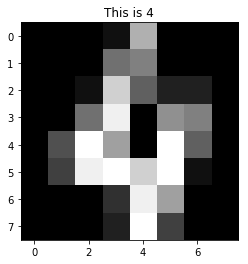

In [2]:
#Just an example
i = 4
#print(digits.target[i])
plt.imshow(digits.images[i], cmap='gray')
plt.title('This is {}'.format(digits.target[i]))
plt.show()

error rate:  0.036171396772398445
error rate for clusters: 
 [ 0.23809524  0.          0.          0.          0.          0.          0.
  0.37777778  0.01818182  0.09756098] 



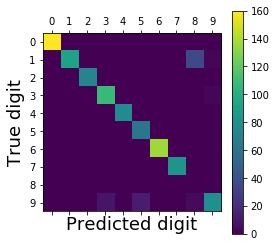

In [128]:
from sklearn.datasets import load_digits
from scipy.cluster.vq import kmeans

digits = load_digits()
digits_64 = digits.images.reshape(digits.images.shape[0],64)

k = 10


summ = 0
centroids, delta = kmeans(digits_64, k, thresh=1e-05 )

p = []
a = []
b = []

pgs = np.zeros(k)
#print(pgs)

for i in range(k):
    p.append([])
    a.append([])
    b.append([])
        


for i in range(1797):
    for j in range(k): 
        if( np.linalg.norm(digits_64[i]-centroids[j]) < delta):
            p[j].append(i)
    


for i in range(k):
    p[i] = np.array(p[i])
    a[i], b[i] = np.unique(digits.target[p[i]], return_counts = True)
    pgs[i] = np.sum(b[i][b[i] != np.max(b[i])]) / np.sum(b[i])
    summ += int( np.sum(b[i][b[i] != np.max(b[i])]))
 

summ = summ/1797
print('error rate: ', summ)
print('error rate for clusters: \n' ,pgs, '\n')

matr = np.zeros((k,k))
for i in range(k):
    for j in range (  b[i].size ):
        matr[ a[i][np.argmax(b[i])]   , a[i][j] ] += b[i][j]

#print( matr )

plt.matshow(matr)
plt.xlabel('Predicted digit', fontsize=18)
plt.ylabel('True digit', fontsize=18)

plt.xticks(np.arange(0, 10, 1))
plt.yticks(np.arange(0, 10, 1))

plt.colorbar()

plt.show()





0 predicted  with the best accuracy and there is  no 8 at all

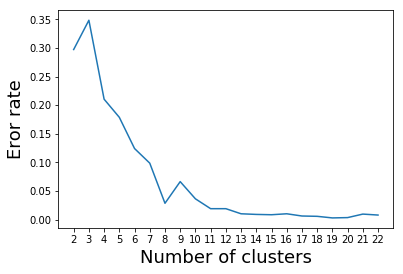

In [191]:
from sklearn.datasets import load_digits
from scipy.cluster.vq import kmeans

digits = load_digits()
digits_64 = digits.images.reshape(digits.images.shape[0],64)

k = 10
m = 2 
n = 23


error_rate1 = np.zeros( (n-m))
error_rate2 = np.zeros( (n-m))


for k in range(m, n):
    
    #print(k)
    
    summ = 0
    centroids, delta = kmeans(digits_64, k, thresh=1e-05 )

    p = []
    a = []
    b = []

    pgs = np.zeros(k)
    #print(pgs)

    for i in range(k):
        p.append([])
        a.append([])
        b.append([])



    for i in range(1797):
        for j in range(k): 
            if( np.linalg.norm(digits_64[i]-centroids[j]) < delta):
                p[j].append(i)



    for i in range(k):
        p[i] = np.array(p[i])
        a[i], b[i] = np.unique(digits.target[p[i]], return_counts = True)
        summ += int( np.sum(b[i][b[i] != np.max(b[i])]))
    

    summ = summ/1797
    
    error_rate1[k-m] = k
    error_rate2[k-m] = summ

    
plt.plot(error_rate1, error_rate2)

plt.xticks(np.arange(m, n, 1))
#plt.yticks(np.arange(0, 1, 1))
plt.xlabel('Number of clusters', fontsize=18)
plt.ylabel('Eror rate', fontsize=18)
plt.show()



As we can see, the more clusters we have the lower the error rate is,but with cluster values greater than 13, it starts to behave like a constant.
Let k = 14.

Prevalet digit for cluster  1 is  7
And the digit is


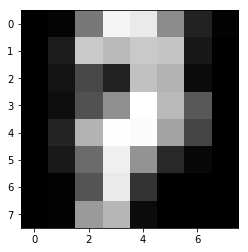

Prevalet digit for cluster  2 is  6
And the digit is


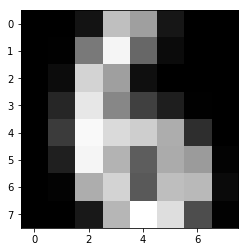

Prevalet digit for cluster  3 is  1
And the digit is


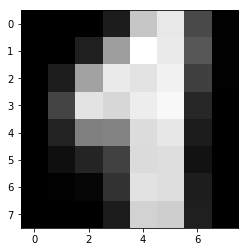

Prevalet digit for cluster  4 is  5
And the digit is


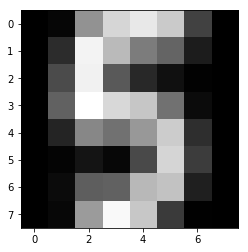

Prevalet digit for cluster  5 is  8
And the digit is


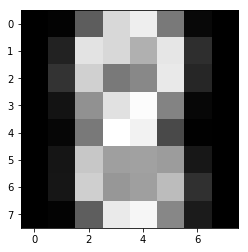

Prevalet digit for cluster  6 is  2
And the digit is


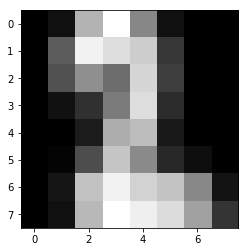

Prevalet digit for cluster  7 is  0
And the digit is


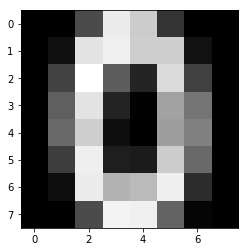

Prevalet digit for cluster  8 is  7
And the digit is


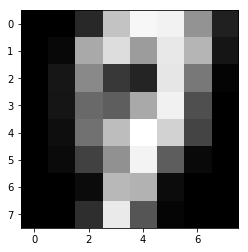

Prevalet digit for cluster  9 is  4
And the digit is


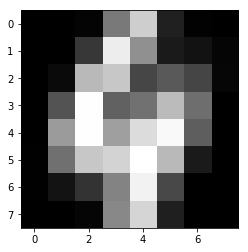

Prevalet digit for cluster  10 is  5
And the digit is


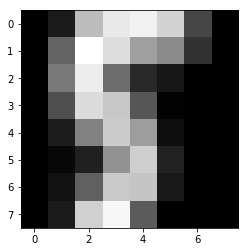

Prevalet digit for cluster  11 is  3
And the digit is


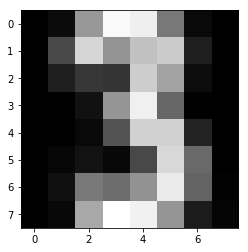

Prevalet digit for cluster  12 is  9
And the digit is


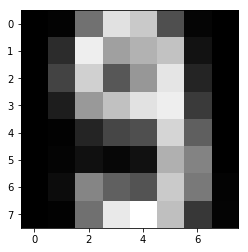

Prevalet digit for cluster  13 is  1
And the digit is


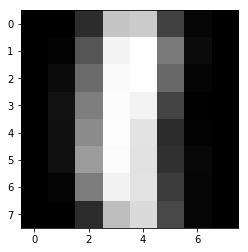

In [189]:
k = 13

centroids, delta = kmeans(digits_64, k, thresh=1e-05 )

p = []
a = []
b = []

pgs = np.zeros(k)
#print(pgs)

for i in range(k):
    p.append([])
    a.append([])
    b.append([])
        


for i in range(1797):
    for j in range(k): 
        if( np.linalg.norm(digits_64[i]-centroids[j]) < delta):
            p[j].append(i)
    
centroids = centroids.reshape((k, 8, 8))

for i in range(k):
    p[i] = np.array(p[i])
    a[i], b[i] = np.unique(digits.target[p[i]], return_counts = True)
    print("Prevalet digit for cluster ", i+1, "is ", a[i][np.argmax(b[i])])
    print("And the digit is")
    plt.imshow(centroids[i], cmap='gray')
    plt.show()
    
    
# plt.imshow(digits.images[i], cmap='gray')
# plt.title('This is {}'.format(digits.target[i]))
# plt.show()

As we can see all the pictures match their predicted values.